In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [0]:
data = pd.read_csv('/content/drive/My Drive/ML batch 2019 June/input/50_Startups.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [0]:
from sklearn.impute import SimpleImputer

In [0]:
# !pip install --upgrade sklearn 

In [0]:
imputer = SimpleImputer(missing_values=0)

In [0]:
data[['R&D Spend','Marketing Spend']] = imputer.fit_transform(data[['R&D Spend','Marketing Spend']])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [0]:
state_dummies = pd.get_dummies(data.State, prefix='State')

In [0]:
data = pd.concat([data,state_dummies],axis=1)

In [0]:
data.drop(['State','State_New York'],axis=1,inplace=True)

In [36]:
data.columns.tolist()

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'Profit',
 'State_California',
 'State_Florida']

In [0]:
X = data[['R&D Spend','Administration','Marketing Spend', 'State_California','State_Florida']]
y = data['Profit']

In [0]:
# split this into two set
from sklearn.model_selection import train_test_split

In [0]:
trainX,testX,trainY,testY = train_test_split(X,y,test_size=.25, random_state = 75)

In [83]:
model = LinearRegression()
model.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
model.score(testX,testY) * 100

94.95792302425593

In [85]:
def get_best_model(X,y,state=0):
    trainX,testX,trainY,testY = train_test_split(X,y,test_size=.25, random_state = state)
    model = LinearRegression()
    model.fit(trainX,trainY)
    score = model.score(testX,testY) * 100
    return score,state

out = [get_best_model(X,y,i) for i in range(100)]
out.sort()
out[-1] # highest

(94.95792302425593, 75)

In [0]:
# !pip install plotly-express

In [0]:
ypred = model.predict(testX)

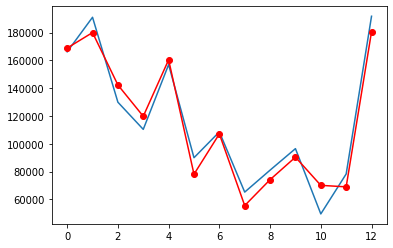

In [97]:
plt.plot(testY.tolist())
plt.plot(ypred,'ro-')

In [0]:
data

In [0]:
#@title Profit Predict system
startup = "monkey business " #@param {type:"string"}
rnd = 229750 #@param {type:"slider", min:0, max:500000, step:10}
admin = 114260 #@param {type:"slider", min:0, max:500000, step:10}
mkt = 232870 #@param {type:"slider", min:0, max:500000, step:10}
state = "Florida" #@param ["California", "Florida", "New York"]


In [0]:
if state == 'California':
    sc = 1
    sf = 0
elif state == 'Florida':
    sc= 0
    sf =1
else:
    sc = 0
    sf = 0
profit = model.predict(np.array([[rnd,admin,mkt,sc,sf]]))[0]

In [135]:
print(f'predict profit for startup {startup} = {round(profit)}')

predict profit for startup monkey business  = 401100.0


In [113]:
startup

'monkey business '